## **Requisitos previos**

* Importación de las librerías Pandas, Numpy, Scipy, Matplotlib y Seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

* Conexión de Colab con Drive. Se deben copiar el database ejemplo en el drive a ser utilizado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


* Carga del dataset

In [ ]:
ruta = '/content/drive/MyDrive/PYTHON/Bases/'
spoti = pd.read_csv(ruta+'dataset.csv')
spoti = spoti.assign(segundos = (spoti.duration_ms/1000))
spoti.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,segundos
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,230.666


Ahora solo seleccionamos las columnas con las que vamos a trabajar.

In [ ]:
spoti = spoti[['track_name', 'track_genre', 'popularity', 'loudness', 'tempo', 'segundos', 'time_signature']]
spoti.head(3)

,track_name,track_genre,popularity,loudness,tempo,segundos,time_signature
0,Comedy,acoustic,73,-6.746,87.917,230.666,4
1,Ghost - Acoustic,acoustic,55,-17.235,77.489,149.610,4
2,To Begin Again,acoustic,57,-9.734,76.332,210.826,4


Filtrar los valores de acuerdo a los géneros:

     Urbano: Se incluira los géneros de reggaeton, latin y latino.

     Rock: Se incluira los géneros de rock, hard rock y alt-rock.

In [ ]:
Urbano = spoti[spoti['track_genre'].isin(['latin', 'latino', 'reggaeton'])]
Urbanop = Urbano[Urbano['popularity'] >= 70]
Urbanop.head(3)

,track_name,track_genre,popularity,loudness,tempo,segundos,time_signature
67050,Despacito,latin,80,-4.787,177.928,229.360,4
67150,Shower,latin,78,-7.548,119.987,206.166,4
67151,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",latin,79,-3.112,94.968,201.526,4


In [ ]:
rock = spoti[spoti['track_genre'].isin(['rock', 'alt-rock', 'hard-rock'])]
rockp = rock[rock['popularity'] >= 70]
rockp.head(3)

,track_name,track_genre,popularity,loudness,tempo,segundos,time_signature
2000,Daddy Issues,alt-rock,87,-9.461,85.012,260.173,4
2001,Little Dark Age,alt-rock,83,-6.156,97.512,299.960,4
2002,Softcore,alt-rock,86,-5.509,93.986,206.280,4


Obtenemos los valores estadisticos de cada género

In [ ]:
Urbanop.describe()

,popularity,loudness,tempo,segundos,time_signature
count,393.000000,393.000000,393.000000,393.000000,393.000000
mean,79.180662,-4.896127,119.038888,210.917941,3.994911
std,6.605921,1.622500,30.928619,42.512186,0.142766
min,70.000000,-12.813000,77.281000,93.652000,3.000000
25%,74.000000,-5.726000,94.999000,186.133000,4.000000
50%,78.000000,-4.733000,105.059000,205.714000,4.000000
75%,83.000000,-3.702000,130.001000,231.603000,4.000000
max,98.000000,-0.722000,200.031000,417.920000,5.000000


In [ ]:
rockp.describe()

,popularity,loudness,tempo,segundos,time_signature
count,512.000000,512.000000,512.000000,512.000000,512.000000
mean,76.681641,-6.880332,120.326359,248.132236,3.947266
std,4.908379,2.900134,27.639284,68.919062,0.263857
min,70.000000,-19.793000,61.657000,92.866000,1.000000
25%,73.000000,-8.646250,100.036750,202.993750,4.000000
50%,76.000000,-6.133500,119.988500,235.226500,4.000000
75%,80.000000,-4.846500,137.786250,282.306500,4.000000
max,96.000000,-1.399000,203.006000,547.106000,5.000000


Pruebas de normalidad sobre las variables mayores a 70 en popularidad

In [ ]:
stat, p = stats.normaltest(rockp.loudness)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que los datos sigan una distribución normal')
else:
 print('Se rechaza la hipotesis nula de que los datos sigan una distribución normal')

stat=73.521, p=0.000
Se rechaza la hipotesis nula de que los datos sigan una distribución normal


In [ ]:
stat, p = stats.normaltest(rockp.tempo)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que los datos sigan una distribución normal')
else:
 print('Se rechaza la hipotesis nula de que los datos sigan una distribución normal')

stat=12.090, p=0.002
Se rechaza la hipotesis nula de que los datos sigan una distribución normal


In [ ]:
stat, p = stats.normaltest(rock.segundos)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que los datos sigan una distribución normal')
else:
 print('Se rechaza la hipotesis nula de que los datos sigan una distribución normal')

stat=695.594, p=0.000
Se rechaza la hipotesis nula de que los datos sigan una distribución normal


In [ ]:
stat, p = stats.normaltest(rock.time_signature)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que los datos sigan una distribución normal')
else:
 print('Se rechaza la hipotesis nula de que los datos sigan una distribución normal')

stat=2914.705, p=0.000
Se rechaza la hipotesis nula de que los datos sigan una distribución normal


Gráfico de noramlidad de las diferentes variables

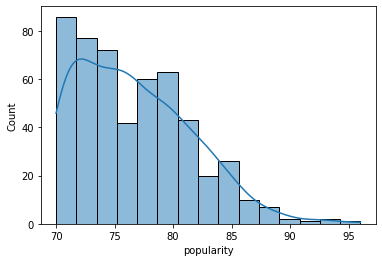

In [ ]:
sns.histplot(x = rockp.popularity, kde = True)

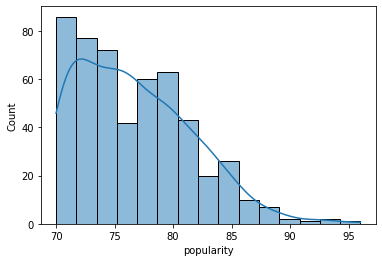

In [ ]:
sns.histplot(x = rockp.popularity, kde = True)

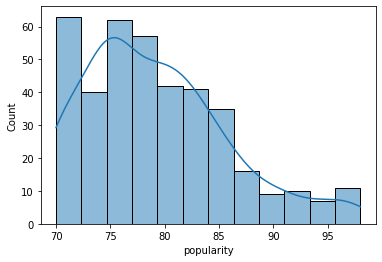

In [ ]:
sns.histplot(x = Urbanop.popularity, kde = True)

Pruebas de varianzas entre urbano y rock

In [ ]:
plUrbano = Urbanop.loc[Urbanop.popularity>=70, 'popularity'].values
print('Varianza popularidad urbano:' ,plUrbano.var())
plRock = rockp.loc[rock.popularity>=70, 'popularity'].values
print('Varianza populuridad rock:',plRock.var())

Varianza popularidad urbano: 43.52715783203517
Varianza populuridad rock: 24.04513168334961


In [ ]:
stat, p = stats.bartlett(plUrbano, plRock)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que las varianzas sean iguales en todas las muestras')
else:
 print('No se rechaza la hipotesis nula y al menos la varianza de una muestra es distinta')

stat=39.549, p=0.000
No se rechaza la hipotesis nula y al menos la varianza de una muestra es distinta


In [ ]:
stat, p = stats.levene(plUrbano, plRock)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que las varianzas sean iguales en todas las muestras')
else:
 print('No se rechaza la hipotesis nula y al menos la varianza de una muestra es distinta')

stat=28.768, p=0.000
No se rechaza la hipotesis nula y al menos la varianza de una muestra es distinta


5. Realizar una prueba de varianza sobre el ratio de deuda, comparando a quienes hacen default contra quienes no hacen default.

In [ ]:
# TU CODIGO AQUI

6. Realiza una prueba de medias sobre la edad, comparando a quienes hacen default contra quienes no hacen default.

In [ ]:
#Data Arrays
print('Varianza edad malos:', plUrbano.var())
print('Varianza edad buenos:', plRock.var())

Varianza edad malos: 43.52715783203517
Varianza edad buenos: 24.04513168334961


In [ ]:
stat, p = stats.ttest_ind(plUrbano, plRock)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
 print('No se rechaza la hipotesis nula de que las medias sean iguales')
else:
 print('Se rechaza la hipotesis nula de que las medias sean iguales')

stat=6.529, p=0.000
Se rechaza la hipotesis nula de que las medias sean iguales


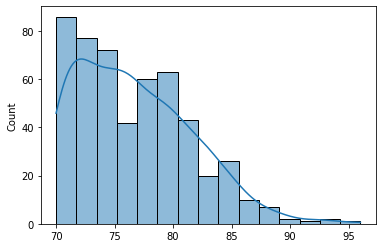

In [ ]:
sns.histplot(plRock, kde=True)

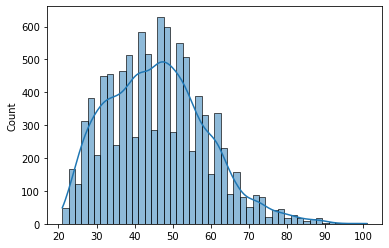

In [ ]:
sns.histplot(edad_malo, kde=True)

In [ ]:
r, p = stats.pearsonr(Urbanop.popularity, Urbanop.segundos)
print('Coeficiente de Correlación:',r)
print('p-valor',p)

Coeficiente de Correlación: 0.033423444481632224
p-valor 0.508825247346568


Calcula la matriz de correlaciones de ambos géneros.

In [ ]:
#Subset de variables
Urbano_pl = Urbanop[['popularity', 'loudness', 'tempo', 'segundos', 'time_signature']].dropna()
Urbano_pl.head(3)

,popularity,loudness,tempo,segundos,time_signature
67050,80,-4.787,177.928,229.360,4
67150,78,-7.548,119.987,206.166,4
67151,79,-3.112,94.968,201.526,4


In [ ]:
#Subset de variables
rock_pl = rock[['popularity', 'loudness', 'tempo', 'segundos', 'time_signature']].dropna()
rock_pl.head(3)

,popularity,loudness,tempo,segundos,time_signature
2000,87,-9.461,85.012,260.173,4
2001,83,-6.156,97.512,299.960,4
2002,86,-5.509,93.986,206.280,4


In [ ]:
# Matriz de Correlación sobre 3 variables URBANO
Urbano_mc = np.corrcoef(Urbano_pl.T).round(decimals=2)
Urbano_mc

array([[ 1.  , -0.2 , -0.01,  0.03, -0.08],
       [-0.2 ,  1.  ,  0.06, -0.02, -0.04],
       [-0.01,  0.06,  1.  , -0.03, -0.01],
       [ 0.03, -0.02, -0.03,  1.  ,  0.05],
       [-0.08, -0.04, -0.01,  0.05,  1.  ]])

In [ ]:
# Matriz de Correlación sobre 3 variables ROCK

rock_mc = np.corrcoef(rock_pl.T).round(decimals=2)
rock_mc


array([[ 1.  , -0.05, -0.06,  0.18,  0.06],
       [-0.05,  1.  ,  0.1 , -0.08,  0.04],
       [-0.06,  0.1 ,  1.  , -0.07, -0.15],
       [ 0.18, -0.08, -0.07,  1.  ,  0.05],
       [ 0.06,  0.04, -0.15,  0.05,  1.  ]])

10. Grafica la matriz de correlaciones construida.

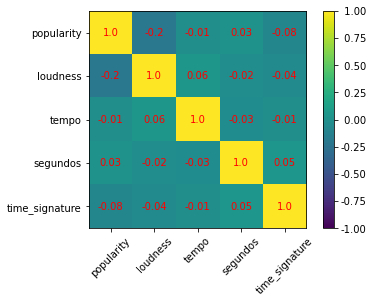

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(Urbano_mc)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=Urbano_pl.columns)
plt.xticks(rotation = 45)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=Urbano_pl.columns)
for i in range(5):
    for j in range(5):
        ax.text(j, i, Urbano_mc[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

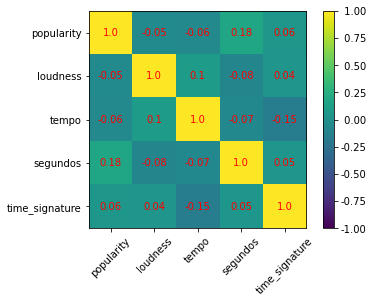

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(rock_mc)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=rock_pl.columns)
plt.xticks(rotation = 45)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=rock_pl.columns)
for i in range(5):
    for j in range(5):
        ax.text(j, i, rock_mc[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()